In [1]:
from mc_moea import *

import imageio

import pickle
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [46]:
data = []
fnames = glob.glob("position/*.dat")
for fname in fnames:
    X = pickle.load(open(fname, "rb"))
    data.append(X)

In [57]:
solutions = pd.read_pickle("solutions/active_run/solution-0300.pkl.bz2")[:100]

In [58]:
solutions["gen_rank"] = solutions["from_generation"].rank()
solutions["fitness_rank"] = solutions["fitness_value"].rank()

In [59]:
solutions["norm_gen_rank"] = solutions["gen_rank"]/max(solutions["gen_rank"])
solutions["norm_fitness_rank"] = solutions["fitness_rank"]/max(solutions["fitness_rank"])

In [60]:
solutions["sec"] = solutions["norm_gen_rank"] + solutions["norm_fitness_rank"]

In [77]:
sorted([str(x).split("\n")[2] for x in solutions.iloc[0].solution_obj.stations])

['        \r\tType: 1800 MHz Type I',
 '        \r\tType: 1800 MHz Type I',
 '        \r\tType: 1800 MHz Type II',
 '        \r\tType: 1800 MHz Type II',
 '        \r\tType: 1800 MHz Type II',
 '        \r\tType: 1800 MHz Type II',
 '        \r\tType: 1800 MHz Type II',
 '        \r\tType: 1800 MHz Type II',
 '        \r\tType: 2600 MHz Type I']

In [70]:
solutions = solutions.sort_values(by="sec")

In [72]:
solutions.iloc[0]

solution_id                       7e144712-e060-4a94-9ca3-e784f6957937
solution_obj         Solution : 7e144712-e060-4a94-9ca3-e784f695793...
from_generation                                                    235
from_method                                                  Crossover
signal_strength                                            -100.454495
construction_cost                                             10030000
num_orphans                                                          0
fitness_value                                                 1.163973
gen_rank                                                          11.0
fitness_rank                                                       5.0
norm_gen_rank                                                    0.125
norm_fitness_rank                                                 0.05
sec                                                              0.175
Name: 4, dtype: object

Text(0.5, 1.0, 'Pattern VI (P = 0.03)')

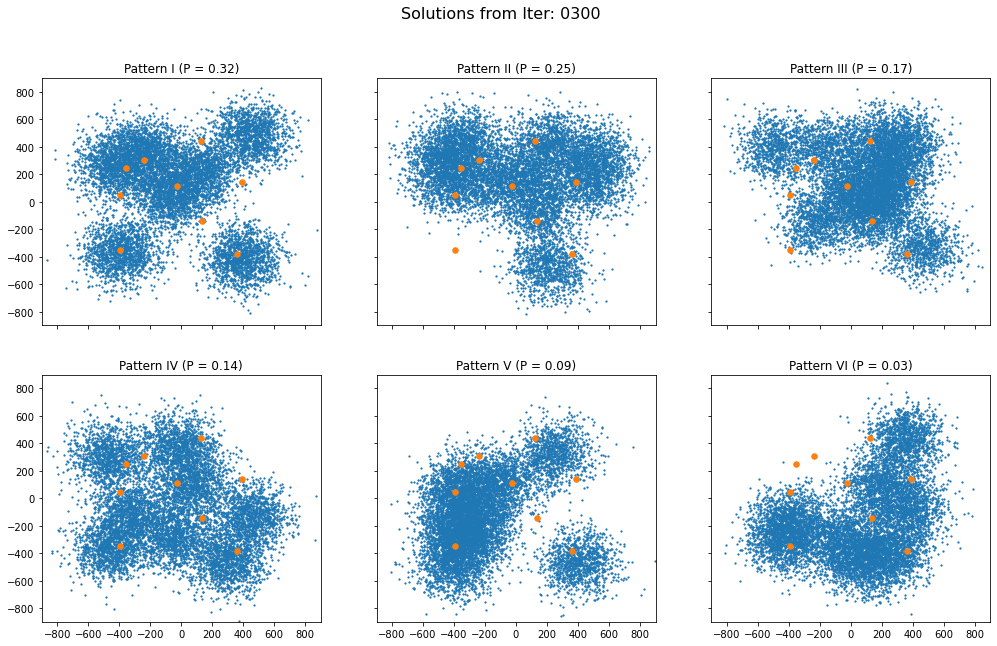

In [78]:
pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[0].stations])
fig, axs = plt.subplots(2,3, figsize=(17,10), sharex=True, sharey=True)
fig.suptitle(f'Solutions from Iter: {300:04d}', fontsize=16)
plt.xlim(-900, 900)
plt.ylim(-900, 900)

axs[0][0].scatter(data[0][:,0], data[0][:,1], s=1.5)
axs[0][0].scatter(pos[:,0], pos[:,1], s=30)
axs[0][0].set_title("Pattern I (P = 0.32)")

axs[0][1].scatter(data[1][:,0], data[1][:,1], s=1.5)
axs[0][1].scatter(pos[:,0], pos[:,1], s=30)
axs[0][1].set_title("Pattern II (P = 0.25)")

axs[0][2].scatter(data[2][:,0], data[2][:,1], s=1.5)
axs[0][2].scatter(pos[:,0], pos[:,1], s=30)
axs[0][2].set_title("Pattern III (P = 0.17)")

axs[1][0].scatter(data[3][:,0], data[3][:,1], s=1.5)
axs[1][0].scatter(pos[:,0], pos[:,1], s=30)
axs[1][0].set_title("Pattern IV (P = 0.14)")

axs[1][1].scatter(data[4][:,0], data[4][:,1], s=1.5)
axs[1][1].scatter(pos[:,0], pos[:,1], s=30)
axs[1][1].set_title("Pattern V (P = 0.09)")

axs[1][2].scatter(data[5][:,0], data[5][:,1], s=1.5)
axs[1][2].scatter(pos[:,0], pos[:,1], s=30)
axs[1][2].set_title("Pattern VI (P = 0.03)")